# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [5]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [6]:
# Your work here.

In [7]:
df.shape

(130, 3)

In [8]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [9]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### 1. Is the distribution of body temperatures normal?

In [10]:
#Graphical Methods.

In [11]:
from matplotlib import pyplot

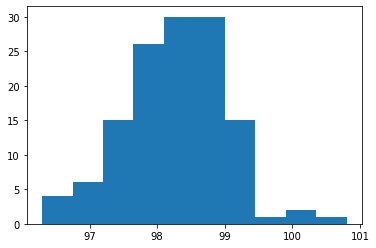

In [12]:
pyplot.hist(df.temperature)
pyplot.show()

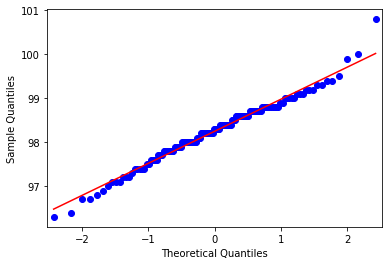

In [13]:
from statsmodels.graphics.gofplots import qqplot

qqplot(df.temperature, line='s')
pyplot.show()

the QQ plot showing the scatter plot of points in a diagonal line, closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.

Statistical Tests
<br> -p <= alpha: reject H0, not normal.
<br> -p > alpha: fail to reject H0, normal.

In [49]:
import scipy 

In [14]:
#Shapiro-Wilk test
from scipy.stats import shapiro

In [15]:
stat, p = shapiro(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.987, p=0.233


In [16]:
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)


In [17]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest

In [34]:
stat, p = normaltest(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=2.704, p=0.259


In [35]:
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)


### 2. Is the sample size large? Are the observations independent?

- The sample size of 130 is large since the considered large sample is sample with number of observations >= 30 
- We can assume the observations are independent if each observation was taken from a different person (no one does multiple test for the observations)

### 3. Is the true population mean really 98.6 degrees F?

In [37]:
sample_mean = np.mean(df.temperature)

In [38]:
sample_mean

98.24923076923078

sample mean is 0.4 lower than the population mean

- First, try a bootstrap hypothesis test.

H0: sample data came from the poputation mean of 98.6F

In [36]:
import numpy as np

In [39]:
shift_temperature= df.temperature - sample_mean + 98.6

In [45]:
reps = 100000
bs = np.empty(reps)

for i in range(reps):
    bs[i] = np.mean(np.random.choice(shift_temperature, size=len(shift_temperature)))
    
# compute p-value
p = np.sum(bs <= np.mean(df.temperature))/reps

print('p: ', p)

p:  0.0


P = 0.0 therefore we reject the null hypothesis. So we can conclude that the data did not come from the poputation mean of 98.6F

- Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

-One-sample test, because we only have one dataset with mean of 98.249 that we want to compare to a population data with mean of 98.6 which we don't have
<br>-Since we don't know the population standard deviation, we use t-test

In [50]:
stat, p = scipy.stats.ttest_1samp(df.temperature,98.6)

In [51]:
p

2.4106320415561276e-07

since p is nearly zero, We reject H0.

- Now try using the other test. How is the result be different? Why?

In [56]:
import statsmodels
from statsmodels.stats import weightstats

stat, p = statsmodels.stats.weightstats.ztest(x1=df.temperature, x2=None, value=98.6, alternative='two-sided', usevar='pooled', ddof=1.0)

In [57]:
p

4.9021570141012155e-08

p-value from z-test is close but smaller than p-value from t-test, this is because z-distribution has lighter tails than t-distribution and it affects the p-value.

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests

In [58]:
np.random.seed(123)
sample_10 = np.random.choice(df.temperature, 10)
sample_10

array([97.3, 97.7, 97.4, 98.8, 98.2, 99.2, 97. , 97.2, 98.2, 99.9])

In [59]:
sample_10.mean()

98.09

In [60]:
tstat, t_p = scipy.stats.ttest_1samp(sample_10,98.6)
zstat, z_p = statsmodels.stats.weightstats.ztest(x1=sample_10, x2=None, value=98.6, alternative='two-sided', usevar='pooled', ddof=1.0)

In [61]:
print('p-value from t-score: ', t_p)
print('p-value from z-score: ', z_p)

p-value from t-score:  0.12675736026885132
p-value from z-score:  0.09246452268183201


Both of these p-values are significantly larger than those from the previous exercise with 130 observations. The p-value from t-test is also larger than from z-test. This is due to the small sample size and it is too small for z-test since one of the property for z-test is the sample size > 30.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

- As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

In [63]:
reps = 100000
bs_replicates = np.empty(reps)

for i in range(reps):
    bs_replicates[i] = np.mean(np.random.choice(df.temperature, size=len(df)))

- Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [73]:
mean = np.mean(bs_replicates)
std = np.std(bs_replicates)
margin_of_error = std * 2 
conv_intv = [mean - margin_of_error, mean + margin_of_error] 
p = np.sum((bs_replicates <= conv_intv[0] ) | (bs_replicates >= conv_intv[1])) / reps 

print('Confidence interval within 2 std or 95%: ', conv_intv, '\nProbability of observation outside convidence interval: ', p)

Confidence interval within 2 std or 95%:  [98.12162782909165, 98.37677654013915] 
Probability of observation outside convidence interval:  0.04533


We can say that someone with temperature below 98.1F and above 98.4F can be considered "abnormal" as its temperature is too-low or too-high. The probability of the case occurs is < 0.05 from the simulation.

### 6. Is there a significant difference between males and females in normal temperature?

- What testing approach did you use and why?

H0: Male and female have the same mean temperature (difference of means = 0)

In [75]:
#split data to two subsets, for female and male temperature

male = df[df.gender=='M'].temperature
female = df[df.gender=='F'].temperature

In [87]:
male.mean()

98.1046153846154

In [88]:
female.mean()

98.39384615384613

In [89]:
diff = female.mean() - male.mean()

In [90]:
diff

0.289230769230727

In [76]:
len(male)

65

In [77]:
len(female)

65

We're gonna use two-sample test since we have two sets of data for male and female

In [79]:
shift_male = male - male.mean() + df.temperature.mean()
shift_female = female - female.mean() + df.temperature.mean()

In [80]:
bs_male = np.empty(reps)
bs_female = np.empty(reps)

for i in range(reps):
    bs_male[i] = np.mean(np.random.choice(shift_male, size=len(shift_male)))
    bs_female[i] = np.mean(np.random.choice(shift_female, size=len(shift_female)))

In [86]:
p = np.sum((bs_female - bs_male) >= (female.mean()-male.mean())) / reps
print('p-value =', p)

p-value = 0.01106


p-value = 0.01. Therefore, we reject the null hypothesis

- Write a story with your conclusion in the context of the original problem.

From the experiments above, we can conclude that the sample data of body temperature is different from population since the mean is 0.4F lower than population mean. This data also show that there is a significant difference between male and female body temperature.